In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scienceplots as scp

import numpy as np
import torch

matplotlib.rcParams['figure.figsize'] = (20, 6)

import sys
sys.path.append("..")

from argparse import Namespace
from main import main, parse_args
from utils.plotting import plot_change_responses, plot_omission_responses, plot_sequence_responses
from utils.analysis import process_outputs, get_change_responses, get_omission_responses

from utils.data import load_results_files

import os

In [601]:
import importlib 
import utils.plotting
importlib.reload(utils.plotting)
from utils.plotting import *

#### Visualizing output of an example model

In [ ]:
args = parse_args()

# Set arguments
args.train_path = "../datasets/train"
args.test_path = "../datasets/test"
args.seed = 2024
args.device = torch.device(f'cuda:{0}')
args.progress_mode = 'epoch'
args.num_epochs = 70
args.value_start = 1
args.temporal_start = 15
args.energy_start = 25
args.lr = 0.001
args.calculate_dprime = True
args.perception_only = False
args.lambda_energy = 2.0
args.lambda_temporal = 0.5
args.lambda_spatial = 1.0
args.lambda_reward = 0.1

# train
model, data, output, training_progress = main(args)

100%|██████████| 70/70 [04:08<00:00,  3.56s/epoch, dprime=1.62, energy=0.0326, rewards=18, spatial=0.000749, temporal=0.00764, total=0.32, value=2.5]    


In [425]:
Y_train, Y_test, Y_train_om, train_ts, test_ts, train_om_ts, train_oms, test_oms = data.values()
train_responses, train_responses_om, test_responses, test_om_indcs, train_om_indcs = output.values()

##### Example training sequence

(-0.5, 895.5, 31.5, -0.5)

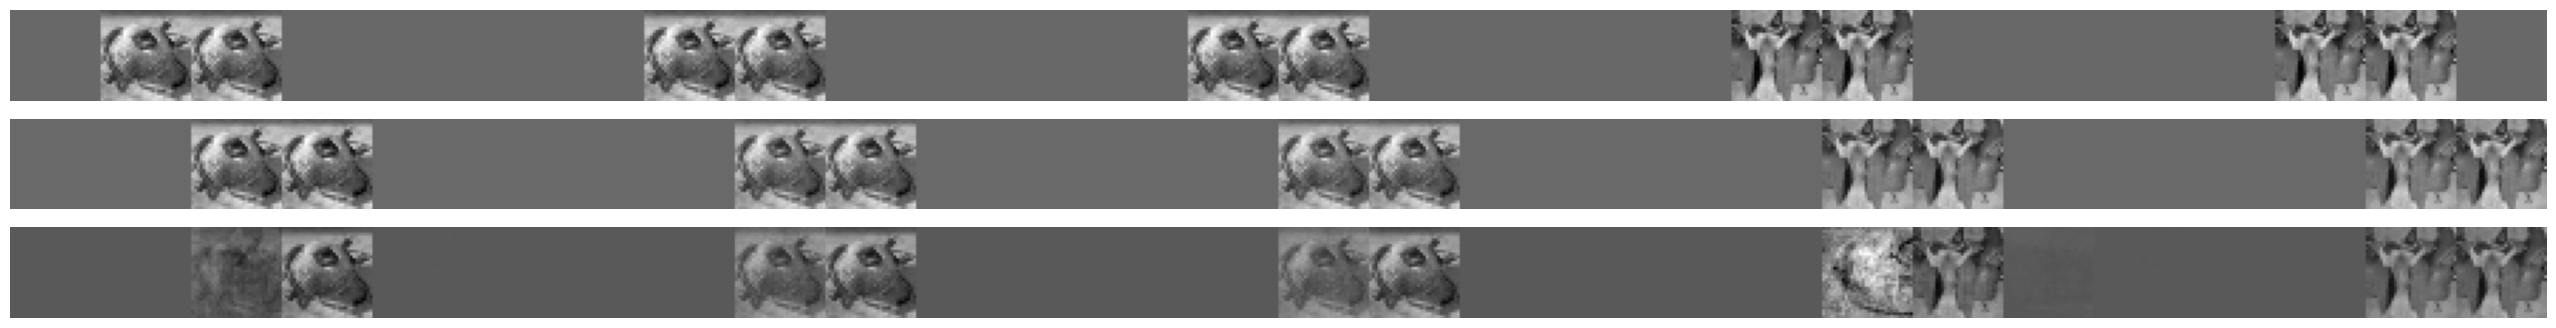

In [426]:
sidx = 11

fam_imgs_fig = plt.figure(figsize=(Y_train.shape[1] * 4, 4))

# True sequence
plt.subplot(3, 1, 1)
plt.imshow(torch.cat(list(Y_train[sidx, 3:31].reshape(-1, args.image_dim, args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

# Reconstructions
plt.subplot(3, 1, 2)
plt.imshow(torch.cat(list(train_responses['I_hat'][sidx, 3:31].reshape(-1,  args.image_dim,  args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

# Predictions
mup, sigp = train_responses['mu_p'][sidx], train_responses['sigma_p'][sidx]
train_predictions = model.reconstruction(mup + torch.randn_like(mup) * sigp)
plt.subplot(3, 1, 3)
plt.imshow(torch.cat(list(train_predictions[3:31].reshape(-1,  args.image_dim,  args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

In [ ]:
fam_imgs_fig.savefig("../figures/figure_3/fam_img_seq.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

##### Example test sequence

(-0.5, 895.5, 31.5, -0.5)

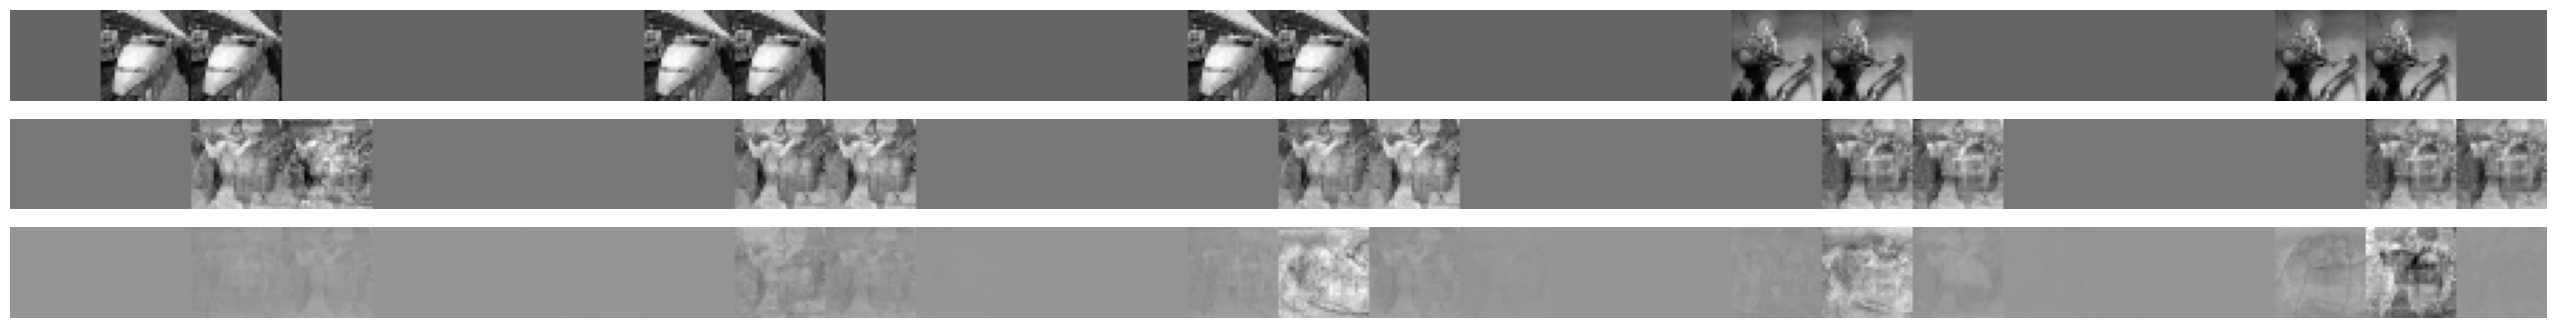

In [427]:
sidx = 111
nov_imgs_fig = plt.figure(figsize=(Y_test.shape[1] * 4, 4))

# True sequence
plt.subplot(3, 1, 1)
plt.imshow(torch.cat(list(Y_test[sidx, 3:31].reshape(-1, args.image_dim, args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

# Reconstructions
plt.subplot(3, 1, 2)
plt.imshow(torch.cat(list(test_responses['I_hat'][sidx, 3:31].reshape(-1,  args.image_dim,  args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

# Predictions
mup, sigp = test_responses['mu_p'][sidx], test_responses['sigma_p'][sidx]
test_predictions = model.reconstruction(mup + torch.randn_like(mup) * sigp)
plt.subplot(3, 1, 3)
plt.imshow(torch.cat(list(test_predictions[3:31].reshape(-1,  args.image_dim,  args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

In [ ]:
nov_imgs_fig.savefig("../figures/figure_3/nov_img_seq.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

##### Individual cell responses (Familiar)

In [429]:
j = -1

In [597]:
j

166

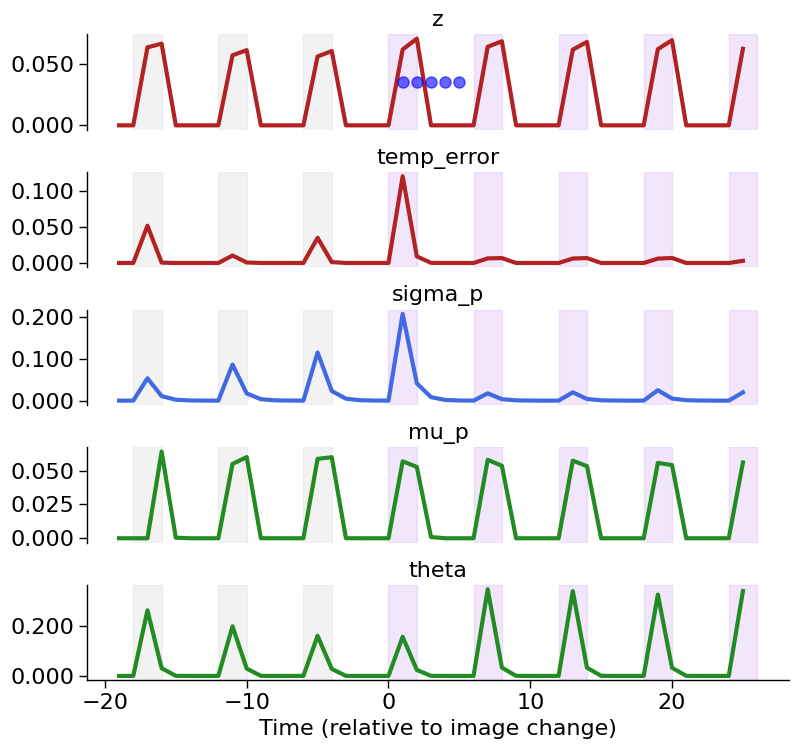

In [602]:
with plt.style.context(['nature', 'notebook']):

    cells_fam_fig, _ = plot_sequence_responses(train_responses, train_ts, seq_idx=j, perception_only=model.perception_only, pop_avg=True)

In [603]:
cells_fam_fig.savefig("../figures/figure_3/sequence_familiar.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

##### Individual cell responses (Novel)

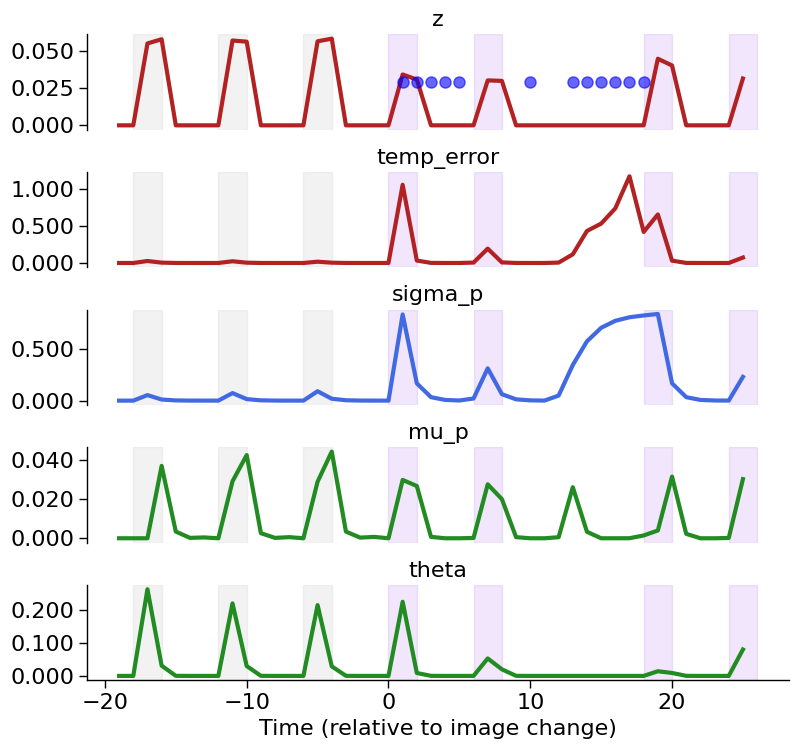

In [1286]:
with plt.style.context(['nature', 'notebook']):

    cells_nov_fig, _ = plot_sequence_responses(test_responses, test_ts, seq_idx=501, perception_only=model.perception_only, pop_avg=True)

In [1287]:
cells_nov_fig.savefig("../figures/figure_3/sequence_novel.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

#### Training progress

In [1288]:
from utils.plotting import plot_training_progress, plot_dprimes

In [1289]:
# load results for the full model
active_args, active_change, active_omission, active_progress = load_results_files("../results/main_model", "perception_action")
active_args = Namespace(**active_args)

In [ ]:
prog_fig = plot_training_progress(active_args, active_progress, save_fig=False)

In [ ]:
prog_fig.savefig("../figures/figure_3/training_progress.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

##### Behavioral performance

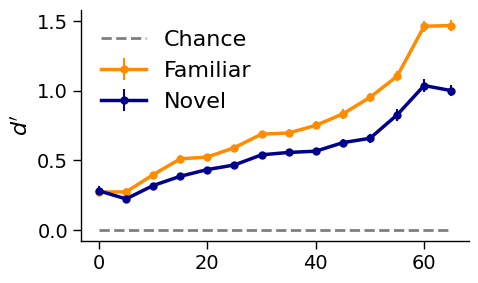

In [1301]:
with plt.style.context(['nature', 'notebook']):


    dprimes_fig, dprimes_ax = plt.subplots(1, 1, figsize=(5, 3))
    plot_dprimes(dprimes_ax, np.arange(active_args.num_epochs, step=5.),
                active_progress['dprime'],
                active_progress['dprime_novel'],
                title="", xlabel='')
    
    dprimes_ax.spines['right'].set_visible(False)
    dprimes_ax.spines['top'].set_visible(False)

In [1302]:
dprimes_fig.savefig("../figures/figure_3/dprimes.pdf", dpi=600, bbox_inches="tight", pad_inches=0)